In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data/data1.csv",header=None)#你的数据格式有问题，我把第一行删了
data.head()

,0,1,2,3
0,199123,47127.43619,743.075187,83
1,82285,26221.72528,508.724098,619
2,4125,23308.26754,204.536037,323
3,8139,20481.16268,220.076230,47
4,14606,21927.08384,189.023916,121


In [3]:
data.columns=["访港旅客总人次","百度指数数据","谷歌数据","新增阳性病例"]

In [4]:
data.head()

,访港旅客总人次,百度指数数据,谷歌数据,新增阳性病例
0,199123,47127.43619,743.075187,83
1,82285,26221.72528,508.724098,619
2,4125,23308.26754,204.536037,323
3,8139,20481.16268,220.076230,47
4,14606,21927.08384,189.023916,121


In [5]:
date=pd.date_range(start='2/2020', end='2/2022',freq="M")

In [6]:
data["日期"]=date
data=data.set_index("日期")
data

,访港旅客总人次,百度指数数据,谷歌数据,新增阳性病例
日期,,,,
2020-02-29,199123,47127.43619,743.075187,83
2020-03-31,82285,26221.72528,508.724098,619
2020-04-30,4125,23308.26754,204.536037,323
2020-05-31,8139,20481.16268,220.076230,47
2020-06-30,14606,21927.08384,189.023916,121
2020-07-31,20568,21224.50393,250.943865,2067
2020-08-31,4449,21117.31243,192.008100,1538
2020-09-30,9132,20228.56105,176.077397,277
2020-10-31,7817,20489.84512,204.866662,236


In [34]:
data=data.iloc[1:,:]#去掉2月的数据
data

,访港旅客总人次,百度指数数据,谷歌数据,新增阳性病例
日期,,,,
2020-03-31,82285,26221.72528,508.724098,619
2020-04-30,4125,23308.26754,204.536037,323
2020-05-31,8139,20481.16268,220.076230,47
2020-06-30,14606,21927.08384,189.023916,121
2020-07-31,20568,21224.50393,250.943865,2067
2020-08-31,4449,21117.31243,192.008100,1538
2020-09-30,9132,20228.56105,176.077397,277
2020-10-31,7817,20489.84512,204.866662,236
2020-11-30,5962,20627.85574,177.347075,991


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-03-31 to 2022-01-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   访港旅客总人次  23 non-null     int64  
 1   百度指数数据   23 non-null     float64
 2   谷歌数据     23 non-null     float64
 3   新增阳性病例   23 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 920.0 bytes


### 单位根检验
返回的具体值可参考https://blog.csdn.net/orDream/article/details/100038076

In [36]:
print(sm.adfuller(data.访港旅客总人次))
print(sm.adfuller(data.谷歌数据))
print(sm.adfuller(data.新增阳性病例))
print(sm.adfuller(data.百度指数数据))

(-1.0595697320383304, 0.7309229204961646, 8, 14, {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 217.4497457832901)
(-1.393271658713727, 0.5854974853647013, 9, 13, {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}, 113.86470819349483)
(-2.902644638303587, 0.04504132520988709, 0, 22, {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}, 214.1075351131322)
(-4.397021048105044, 0.0003004567337039834, 0, 22, {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}, 208.92450733522443)


### Ljung-Box Q 检验
返回的是LB统计量和p值

In [37]:
print(sm.q_stat(data.访港旅客总人次,nobs=24))
print(sm.q_stat(data.谷歌数据,nobs=24))
print(sm.q_stat(data.新增阳性病例,nobs=24))
print(sm.q_stat(data.百度指数数据,nobs=24))

(array([1.83695324e+11, 1.84177949e+11, 1.86146322e+11, 1.92802381e+11,
       2.06695991e+11, 2.07382170e+11, 2.10443199e+11, 2.12826313e+11,
       2.14305003e+11, 2.15360797e+11, 2.16276610e+11, 2.17846751e+11,
       2.20374270e+11, 2.22405917e+11, 2.24357166e+11, 2.27355486e+11,
       2.34050075e+11, 2.46205358e+11, 2.58385170e+11, 2.72031833e+11,
       2.90772230e+11, 3.18622817e+11, 3.49760477e+11]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]))
(array([ 7021362.16177435,  8207954.61765432,  9647122.87169584,
       10761900.14527906, 12830060.23948065, 14108120.06895513,
       15246121.70626104, 16882965.32502291, 18191367.90148282,
       19588774.99462783, 20962531.95503598, 22565327.3369652 ,
       24214221.91457925, 25536597.66249167, 27369977.268398  ,
       29763344.94504362, 33843714.32327045, 38949006.47580719,
       44304392.37957306, 51108819.93352141, 56967540.75485514,
       68033470.20494837, 9226

### 计算自相关系数和偏相关系数

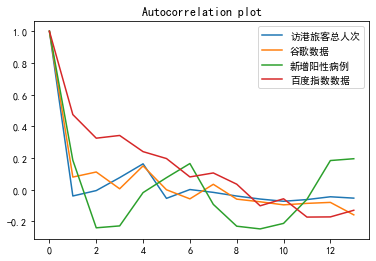

In [38]:
#计算自相关系数和画图
plt.rcParams['axes.unicode_minus'] = False#设置负的坐标轴显示
plt.rcParams["font.family"] = "SimHei" # 设置全局中文字体为黑体
acf1=sm.acf(data.访港旅客总人次)
acf2=sm.acf(data.谷歌数据)
acf3=sm.acf(data.新增阳性病例)
acf4=sm.acf(data.百度指数数据)
plt.plot(acf1)
plt.plot(acf2)
plt.plot(acf3)
plt.plot(acf4)
plt.title("Autocorrelation plot")
plt.legend(["访港旅客总人次","谷歌数据","新增阳性病例","百度指数数据"])

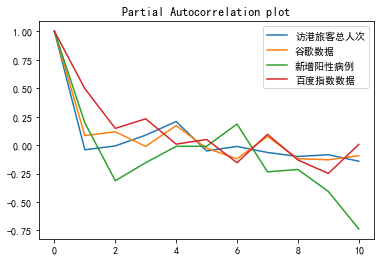

In [39]:
#计算偏自相关系数和画图
pacf1=sm.pacf(data.访港旅客总人次)
pacf2=sm.pacf(data.谷歌数据)
pacf3=sm.pacf(data.新增阳性病例)
pacf4=sm.pacf(data.百度指数数据)
plt.plot(pacf1)
plt.plot(pacf2)
plt.plot(pacf3)
plt.plot(pacf4)
plt.title("Partial Autocorrelation plot")
plt.legend(["访港旅客总人次","谷歌数据","新增阳性病例","百度指数数据"])

### 建立ARMA模型
![](ARMA定阶问题.png)

In [40]:
arma_models=sm.ARIMA(data.访港旅客总人次,order=(2,0,2)).fit()#这里是ARMA(2,2)模型
arma_models.summary()
#模型的估计结果还是不错的

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                访港旅客总人次   No. Observations:                   23
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -926.814
Date:                Wed, 13 Apr 2022   AIC                           1865.628
Time:                        22:08:47   BIC                           1872.440
Sample:                    03-31-2020   HQIC                          1867.341
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.132e+04    213.425     53.050      0.000    1.09e+04    1.17e+04
ar.L1         -0.0771      0.002    -41.616      0.000      -0.081      -0.073
ar.L2          0.9227      0.002    499.151      0.000       0.919       0.926
ma.L1         -1.3601      0.004   -320.659      0.000      -1.368      -1.352
ma.L2          0.9964      0.004    247.988      0.000       0.989       1.004
sigma2      1.858e+06      0.028   6.58e+07      0.000    1.86e+06    1.86e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                20.65
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+24. Standard errors may be unstable.
"""

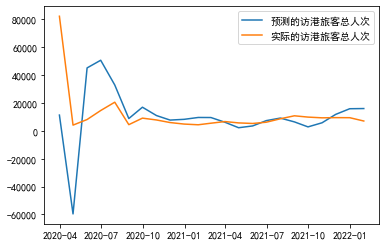

In [41]:
#做预测
pre=arma_models.predict()
pre.index=data.index
plt.plot(pre)
plt.plot(data.访港旅客总人次)
plt.legend(["预测的访港旅客总人次","实际的访港旅客总人次"])

In [42]:
#计算误差
import math
y_true=data.访港旅客总人次.values
y_predict=pre.values
mse = np.sum((y_true - y_predict) ** 2) / len(y_true)
rmse = math.sqrt(mse)
mae = np.sum(np.absolute(y_true - y_predict)) / len(y_true)
mape = np.sum(np.absolute(y_true - y_predict) / y_true)
print(mse)
print(rmse)
print(mae)
print(mape)

534937479.22237813
23128.715468490205
12616.882849021069
34.08338906090283


### 建立ARMIMX模型

In [43]:
X=data[["谷歌数据","新增阳性病例","百度指数数据"]]#这里的X可以根据你的需要来换，X=data[["新增阳性病例","百度指数数据"]]
armax_models=sm.ARIMA(data.访港旅客总人次,X,order=(2,0,2)).fit()#这里是ARMAX(2,2)模型
armax_models.summary()
#模型的估计结果还是不错的

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                访港旅客总人次   No. Observations:                   23
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -220.947
Date:                Wed, 13 Apr 2022   AIC                            459.893
Time:                        22:09:00   BIC                            470.113
Sample:                    03-31-2020   HQIC                           462.463
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.387e+04   8883.728     -3.812      0.000   -5.13e+04   -1.65e+04
谷歌数据         216.4078     13.743     15.746      0.000     189.471     243.344
新增阳性病例        -0.0655      1.210     -0.054      0.957      -2.438       2.307
百度指数数据         0.0590      0.544      0.108      0.914      -1.008       1.126
ar.L1         -0.0217      0.284     -0.076      0.939      -0.579       0.535
ar.L2          0.2885      0.292      0.989      0.323      -0.283       0.860
ma.L1         -0.0006     42.202  -1.35e-05      1.000     -82.715      82.714
ma.L2         -0.9994      0.613     -1.631      0.103      -2.201       0.202
sigma2      9.329e+06      0.002   6.01e+09      0.000    9.33e+06    9.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.87   Prob(JB):                         0.49
Heteroskedasticity (H):               0.42   Skew:                             0.05
Prob(H) (two-sided):                  0.24   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+29. Standard errors may be unstable.
"""

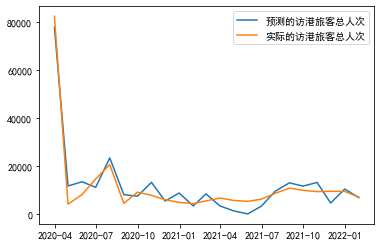

In [44]:
#做预测
pre=armax_models.predict()
pre.index=data.index
plt.plot(pre)
plt.plot(data.访港旅客总人次)
plt.legend(["预测的访港旅客总人次","实际的访港旅客总人次"])
#很明显加上x以后预测效果好了很多

In [45]:
#计算误差
import math
y_true=data.访港旅客总人次.values
y_predict=pre.values
mse = np.sum((y_true - y_predict) ** 2) / len(y_true)
rmse = math.sqrt(mse)
mae = np.sum(np.absolute(y_true - y_predict)) / len(y_true)
mape = np.sum(np.absolute(y_true - y_predict) / y_true)
print(mse)
print(rmse)
print(mae)
print(mape)

13480714.733090468
3671.609283827797
3186.9993761087812
10.507747170405715


### 随机森林预测

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',
                              n_estimators=25,
                              random_state=1,
                              n_jobs=1)
X=data[["谷歌数据","新增阳性病例","百度指数数据"]].values#这里的X可以根据你的需要来换，X=data[["新增阳性病例","百度指数数据"]]
y=data["访港旅客总人次"]
forest.fit(X,y)

RandomForestClassifier(n_estimators=25, n_jobs=1, random_state=1)

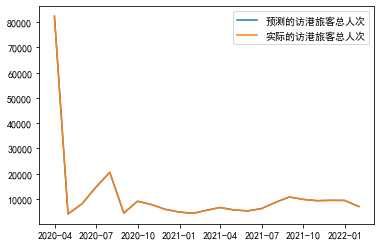

In [47]:
#做预测
pre=forest.predict(X)
plt.plot(data.index,pre)
plt.plot(data.访港旅客总人次)
plt.legend(["预测的访港旅客总人次","实际的访港旅客总人次"])
#随机森林的准确性很高

In [48]:
#计算误差
import math
y_true=data.访港旅客总人次.values
y_predict=pre
mse = np.sum((y_true - y_predict) ** 2) / len(y_true)
rmse = math.sqrt(mse)
mae = np.sum(np.absolute(y_true - y_predict)) / len(y_true)
mape = np.sum(np.absolute(y_true - y_predict) / y_true)
print(mse)
print(rmse)
print(mae)
print(mape)
#随机森林如果不分测试集合训练集的话，预测准确率是100%

0.0
0.0
0.0
0.0


In [49]:
#划分徐训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.3,
                     random_state=0)#保证y是相同的比例分配的

In [50]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, n_jobs=1, random_state=1)

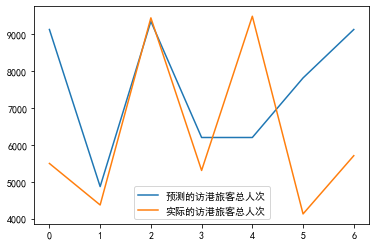

In [51]:
#做预测
pre=forest.predict(X_test)
plt.plot(pre)
plt.plot(y_test.values)
plt.legend(["预测的访港旅客总人次","实际的访港旅客总人次"])
#由于数据量太小，使用随机森林划分数据集以后效果很差

In [52]:
#计算误差
import math
y_true=y_test.values
y_predict=pre
mse = np.sum((y_true - y_predict) ** 2) / len(y_true)
rmse = math.sqrt(mse)
mae = np.sum(np.absolute(y_true - y_predict)) / len(y_true)
mape = np.sum(np.absolute(y_true - y_predict) / y_true)
print(mse)
print(rmse)
print(mae)
print(mape)
#很差很差，这体现了机器学习模型和传统模型的差异，机器学习模型需要大量的数据才能对新数据预测正确，而传统模型不需要，当同样是在一个数据集上建模和预测时，机器学习模型效果很好！

7213203.428571428
2685.7407597479373
2219.4285714285716
2.7971474477418328
